In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Contrastive Losss v2'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'contrastive_learning_rate'], y_min=30)

In [3]:
# viz.plot_single_setting_aggregated('stat-wmm;128;True;0.003;5;nan', fontsize=25, filename="example_run_stat-wmm_rehearsal", layout='vertical')


# viz.plot_single_setting_aggregated(';128;False;0.003;5;nan', fontsize=25, filename="example_run_no_rehearsal", layout='vertical')

In [4]:
viz.extract_all_runs_metrics_after_task_3()

In [5]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[1]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90)
    plt.title(f"metic: {metric_name}       label convention: dataset pretraining? epochs")
    plt.xlabel("unique identifier")
    plt.ylabel("accuracy [%]")
    plt.show()

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

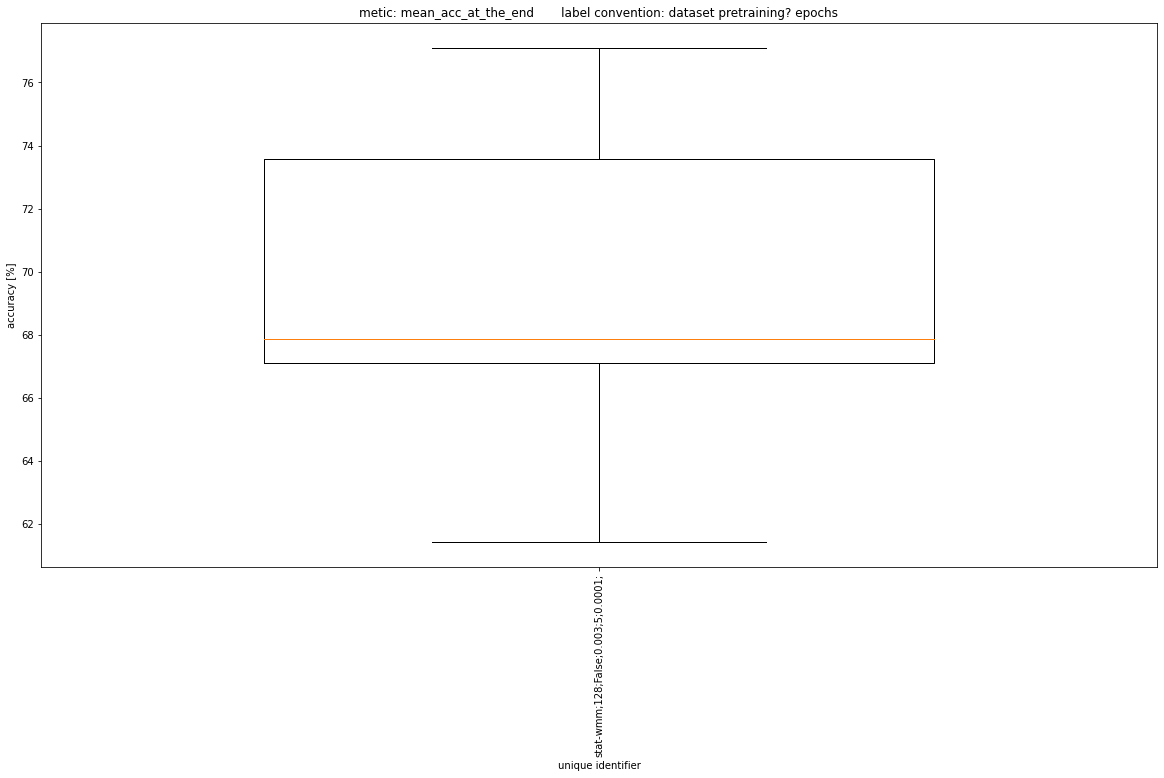

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,contrastive_learning_rate,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,stat-wmm;128;False;0.003;5;0.0001;,69.449997,68.415833,0.550001,71.650002,47.599998,71.849998,67.296354,0.616666,73.699997,...,128,False,0.003,5,0.0001,67.883331,69.449997,28.909726,1.003334,61.530000
1,stat-wmm;128;False;0.003;5;0.0001;,65.300003,65.218750,0.787498,68.449997,43.349998,54.799999,53.606250,0.750000,57.049999,...,128,False,0.003,5,0.0001,61.433333,64.199997,27.248889,1.137500,57.749999
2,stat-wmm;128;False;0.003;5;0.0001;,73.099998,74.152916,1.775000,80.199997,51.750000,75.849998,72.901041,1.333333,79.849998,...,128,False,0.003,5,0.0001,73.583333,73.099998,30.948278,0.811667,66.650000
3,stat-wmm;128;False;0.003;5;0.0001;,67.750000,67.951250,1.225000,72.650002,49.849998,52.500000,53.846875,1.916667,58.250000,...,128,False,0.003,5,0.0001,67.116666,67.750000,29.177313,0.983334,63.950001
4,stat-wmm;128;False;0.003;5;0.0001;,73.050003,72.497083,0.699999,75.849998,51.500000,77.199997,69.489062,0.833333,79.699997,...,128,False,0.003,5,0.0001,77.100001,77.199997,30.368198,0.506667,67.649999


In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['rehearsal_dataset']=='stat-wmm') & (df['pretraining']=='True') & (df['separate_noise_output'].isin(['None']))]
# df = df[(df['batch_size_rehearsal'] != '128')]

box_plot('mean_acc_at_the_end', df)

df

# All runs

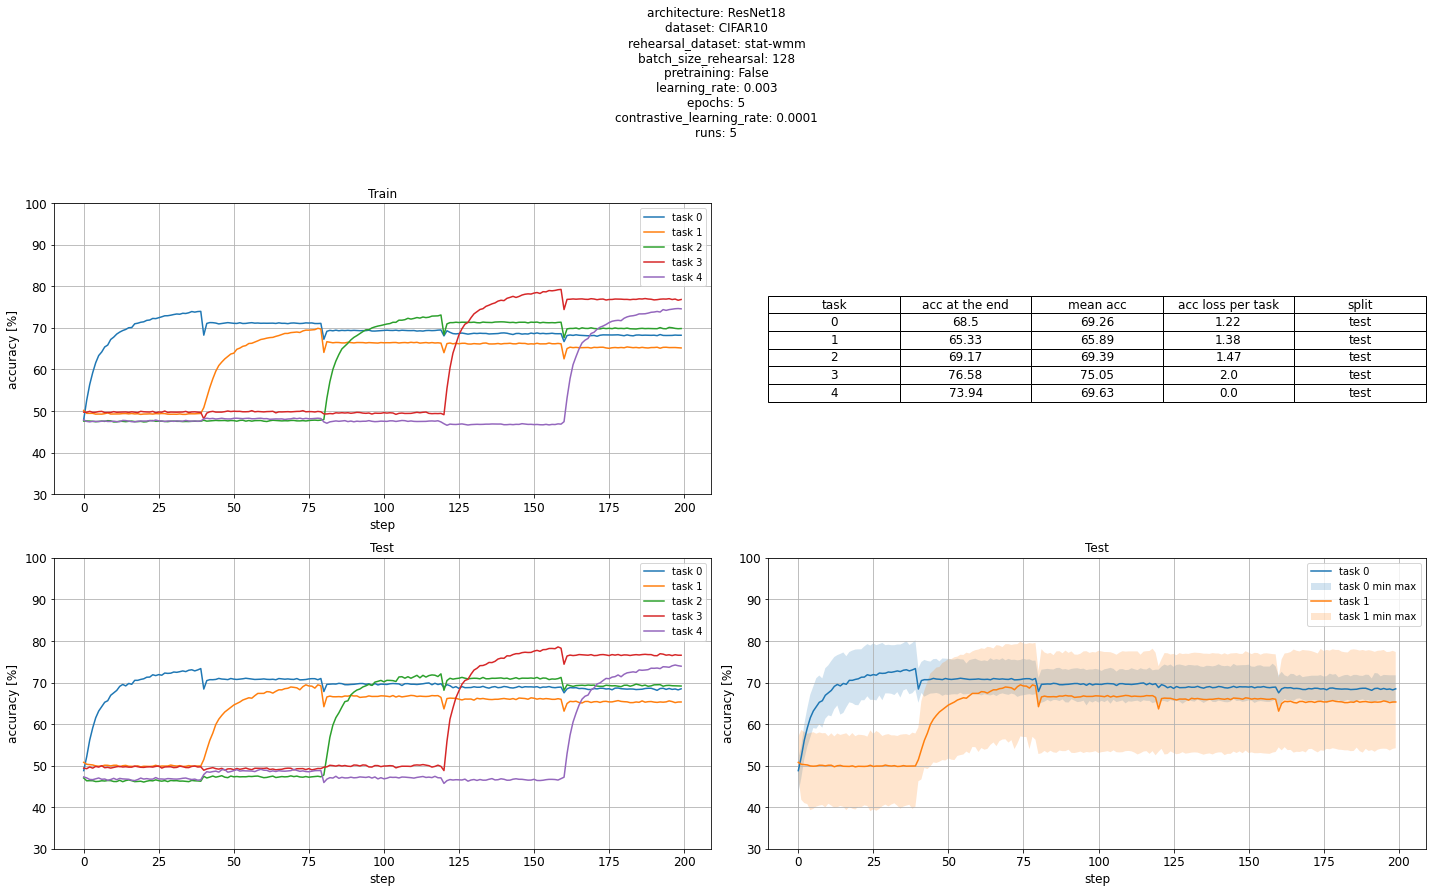

In [7]:
viz.plot_everything()